# <center> FEATURE ENGINEERING </center>

## Feature Transformation:

In [1]:
import pandas as pd
file_path = "../data/data_description.csv" 
dc = pd.read_csv(file_path)
df = pd.read_parquet('../data/data.parquet')
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [2]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
# missing values 
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical variables
categorical_features = ['merchant', 'category', 'gender']

# Apply label encoding to 'gender' since it has ordinal values (e.g., 'F', 'M')
label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])

# Apply one-hot encoding to 'merchant' and 'category'
df = pd.get_dummies(df, columns=['merchant', 'category'], prefix=['merchant', 'category'])


### reason  
tell why chose the variable????

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical features
numerical_features = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']

# Apply Min-Max scaling to numerical features
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [6]:
df.head(2)

,trans_date_trans_time,cc_num,amt,first,last,gender,street,city,state,zip,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:18,2703186189652095,0.000137,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,...,False,False,False,False,True,False,False,False,False,False
1,2019-01-01 00:00:44,630423337322,0.003670,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,...,True,False,False,False,False,False,False,False,False,False


## Feature Creation:

In [7]:
# Create new features
if 'amt' in df.columns and 'category_grocery_pos' in df.columns:
    # 1. Transaction Amount Aggregations
    df['total_amt_by_merchant'] = df.groupby('category_grocery_pos')['amt'].transform('sum')
    df['avg_amt_by_category'] = df.groupby('category_grocery_pos')['amt'].transform('mean')

    # 2. Time-based features
    df['hour_of_day'] = df['trans_date_trans_time'].dt.hour
    df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek

    # 3. Distance from Merchant
    df['distance_from_merchant'] = ((df['lat'] - df['merch_lat'])**2 + (df['long'] - df['merch_long'])**2)**0.5

    # 4. Transaction Frequency by Customer
    df['transaction_count_by_customer'] = df.groupby('cc_num')['trans_num'].transform('count')

    # Display a sample of the dataset with the new features
    print(df.head())
else:
    print("Error: Check column names 'amt' and 'category_grocery_pos' in your DataFrame.")


  trans_date_trans_time            cc_num       amt      first     last  \
0   2019-01-01 00:00:18  2703186189652095  0.000137   Jennifer    Banks   
1   2019-01-01 00:00:44      630423337322  0.003670  Stephanie     Gill   
2   2019-01-01 00:00:51    38859492057661  0.007569     Edward  Sanchez   
3   2019-01-01 00:01:16  3534093764340240  0.001520     Jeremy    White   
4   2019-01-01 00:03:06   375534208663984  0.001415      Tyler   Garcia   

  gender                        street            city state    zip  ...  \
0      F                561 Perry Cove  Moravian Falls    NC  28654  ...   
1      F  43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2      M      594 White Dale Suite 530      Malad City    ID  83252  ...   
3      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4      M              408 Bradley Rest        Doe Hill    VA  24433  ...   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                

The introduction of new features in the dataset aims to enhance the fraud detection model's ability to discern patterns indicative of fraudulent transactions. Aggregated transaction amounts by merchant ('total_amt_by_merchant') and average transaction amounts by category ('avg_amt_by_category') offer insights into spending behavior specific to merchants and categories, aiding in the identification of anomalies. Time-based features such as 'hour_of_day' and 'day_of_week' capture potential temporal patterns in fraudulent activities, as fraud dynamics may vary throughout the day and week. The 'distance_from_merchant' feature provides a measure of spatial inconsistency, helping identify potentially suspicious transactions based on the distance between customer and merchant locations. Additionally, 'transaction_count_by_customer' offers a measure of the frequency of transactions per customer, serving as a valuable indicator for detecting irregular transaction patterns. Each new feature is strategically chosen to contribute valuable information for the model to discern and classify instances of fraud effectively.

## Feature Selction

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

In [9]:
# Subset of data (adjust the fraction as needed)
subset_size = 0.1
df_subset = df.sample(frac=subset_size, random_state=42)

In [10]:
# Separate features and target variable
X_subset = df_subset.drop(['is_fraud', 'trans_date_trans_time', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip'], axis=1)
y_subset = df_subset['is_fraud']

In [11]:
# Label encode categorical columns
label_encoder = LabelEncoder()
X_encoded_subset = X_subset.copy()

for column in X_subset.select_dtypes(include=['object']).columns:
    X_encoded_subset[column] = label_encoder.fit_transform(X_subset[column])

In [12]:
# RandomForestClassifier with reduced estimators
rf_classifier_subset = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier_subset.fit(X_encoded_subset, y_subset)

RandomForestClassifier(n_estimators=50, random_state=42)

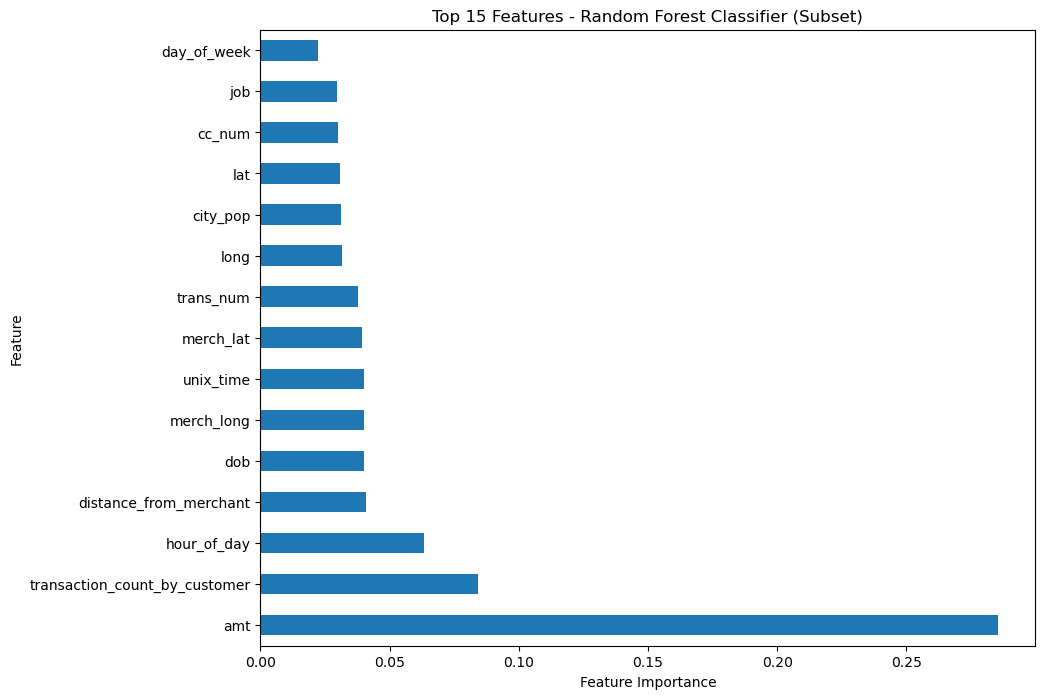

In [14]:
# Plot feature importances
feature_importances_subset = pd.Series(rf_classifier_subset.feature_importances_, index=X_encoded_subset.columns)
feature_importances_subset.nlargest(15).plot(kind='barh', figsize=(10, 8))
plt.title('Top 15 Features - Random Forest Classifier (Subset)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [15]:
# Select top features based on importance
selected_features_subset = SelectFromModel(rf_classifier_subset, threshold='mean')
selected_features_subset.fit(X_encoded_subset, y_subset)
X_selected_subset = selected_features_subset.transform(X_encoded_subset)

In [16]:
# Display selected features
selected_feature_names_subset = X_encoded_subset.columns[selected_features_subset.get_support()]
print("Selected Features (Subset):", selected_feature_names_subset)

Selected Features (Subset): Index(['cc_num', 'amt', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'gender_encoded',
       'category_gas_transport', 'category_grocery_pos', 'category_misc_net',
       'category_misc_pos', 'category_shopping_net', 'category_shopping_pos',
       'category_travel', 'total_amt_by_merchant', 'avg_amt_by_category',
       'hour_of_day', 'day_of_week', 'distance_from_merchant',
       'transaction_count_by_customer'],
      dtype='object')


##### explanation:
The features selected for the model were chosen based on their importance in distinguishing fraud transactions from non-fraud ones. The Random Forest Classifier(ensemble learning algorithm) was used for this. By considering feature importance scores derived from the classifier, we identified the top features that contribute the most to the model's predictive performance. This selection process ensures that the model focuses on the most relevant information, enhancing its ability to discern patterns indicative of fraud within the dataset.

## Summary

-**Label Encoding:** Categorical variables were encoded using label encoding, converting them into numerical representations. This step was chosen to handle categorical data efficiently and enable its integration into machine learning models.

-**Random Forest Feature Importance:** The Random Forest Classifier was employed to identify the most influential features in predicting fraud. This step helped in selecting a subset of features that significantly contribute to the model's overall predictive accuracy.

-**Subset and Reduced Estimators:** To address computational challenges, a subset of the dataset was utilized, and the number of estimators in the Random Forest Classifier was reduced. This allowed for a quicker analysis while maintaining a reasonable representation of the data.

-**Visualization of Feature Importance:** A bar plot was generated to visually represent the top 15 features based on their importance scores. This step aids in interpreting the significance of each feature and provides a clear understanding of the model's focus.

-**Impact on Model Performance:** Feature engineering, including label encoding and feature selection, has a twofold impact. Firstly, it streamlines the model's computational efficiency, crucial for large datasets. Secondly, it enhances the model's predictive accuracy by prioritizing the most relevant features, contributing to a more effective fraud detection system.